# Maximum Likelihood Estimates (MLEs)

The normalized likelihood of each event is $f(x_i;\mathbf{\theta})/A(\mathbf{\theta})$. We assume a Poisson variation for the measured number of events, $N$, about some true mean value, which we require our fitted function to be normalized to 1 by taking as $A(\mathbf{\theta})$.

$$\mathcal{L}(\mathbf{\theta})=\frac{A(\mathbf{\theta})^N e^{-A(\mathbf{\theta})}}{N!}\prod_{i=1}^N\frac{f(x_i;\mathbf{\theta})}{A(\mathbf{\theta})}$$

however it's usually more conveinient to work with the negative log-likelihood

$$-\ln\mathcal{L}(\mathbf{\theta})=-\sum_{i=1}^N\ln\left(\frac{f(x_i;\mathbf{\theta})}{A(\mathbf{\theta})}\right) - N\ln A(\mathbf{\theta})+A(\mathbf{\theta})+\ln N!$$

the $\ln N!$ term is constant and can be dropped. The $N\ln A(\mathbf{\theta})$ terms cancel leaving us a function $-\ln \mathcal{L}$ which has the minimum at the same parameter values $\mathbf{\theta}$ as the maximum of the likelihood $\mathcal{L}$.

$$-\ln\mathcal{L}(\mathbf{\theta})=-\sum_{i=1}^N\ln f(x_i;\mathbf{\theta}) +A(\mathbf{\theta})$$

If we now define $f'(x_i;\mathbf{\theta})\equiv f(x_i;\mathbf{\theta})/A(\mathbf{\theta})$ in order that $f'(x_i;\mathbf{\theta})$ is normalised to 1 and we can regain the standard Maximum Likelihood function

$$-\ln\mathcal{L}'(\mathbf{\theta})=-\sum_{i=1}^N\ln f'(x_i;\mathbf{\theta})$$

The normalization of  $f'(x;\mathbf{\theta})$ can be any constant (with respect to  $\mathbf{\theta}$), not just 1, since this would merely introduce an additive constant which will not change the fit results, just the value of  $-\ln\mathcal{L}'(\mathbf{\theta})$ at the minimum.

Computationally, if  ${\cal L}'(\mathbf{\theta})$ cannot be minimized analytically, the standard Maximum likelihood method is usually more difficult, since here we must calculate the normalization,  $A(\mathbf{\theta})$, for every set of values,  $ \mathbf{\theta}$, that we visit.

### Univariate Poisson Distribution
let's try this with a function
$$f(x|\theta)=\frac{e^{-\theta}\theta^{x_i}}{x_i!}$$

$$-\ln\mathcal{L}(\theta)=\sum_{i=1}^N \ln\left(\frac{e^{-\theta}\theta^{x_i}}{x_i!}\right)$$

$-\ln(x_i)$ is a constant so can be removed. 

$$=\sum_{i=1}^N \ln\left(e^{-\theta}\theta^{x_i}\right)$$
$$=\sum_{i=1}^N \ln(e^{-\theta})+\ln(\theta^{x_i})$$
$$=\sum_{i=1}^N -\theta +x_i\ln(\theta)$$

Now we differentiate:

$$\frac{\partial \mathcal{L}(\theta)}{\partial\theta}=\frac{\partial}{\partial\theta}\left(\sum_{i=1}^N -\theta +x_i\ln(\theta)\right)$$
$$=\sum_{i=1}^N\frac{\partial}{\partial\theta}\left( -\theta +x_i\ln(\theta)\right)$$
$$=\sum_{i=1}^N\left( -1 +\frac{x_i}{\theta}\right)$$

Now the maximum will happen when this function is equal to 0. 
$$-N + \sum_{i=1}^N \frac{x_i}{\theta}=0$$
$$\theta = \frac{\sum_{i=1}^N x_i}{N}$$

### Code for univariate Poisson MLE

In [1]:
import math
from __future__ import division # needed to avoid truncating division value

def poisson_theta_mle(d):
    return sum(d) / len(d)

def likelihood_poisson(x, lam):
    if x // 1 != x:
        likelihood = 0
    else:
        likelihood = math.e**(-lam) * lam**(x) / math.factorial(x)
    return likelihood

Sample data is obtained from numpy

In [2]:
import numpy as np

true_param = 1.0
poisson_data = np.random.poisson(lam=true_param, size=100)

In [3]:
mle_poiss = poisson_theta_mle(poisson_data)

print 'MLE:', mle_poiss

MLE: 1.09


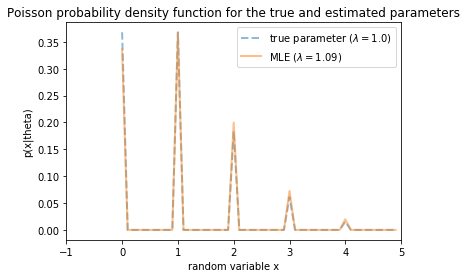

In [4]:
# Plot Probability Density Function
from matplotlib import pyplot as plt
#%matplotlib inline    
x_range = np.arange(0, 5, 0.1)
y_true = [likelihood_poisson(x, true_param) for x in x_range]
y_mle = [likelihood_poisson(x, mle_poiss) for x in x_range]

plt.figure()
plt.plot(x_range, y_true, lw=2, alpha=0.5, linestyle='--', label='true parameter ($\lambda={}$)'.format(true_param))
plt.plot(x_range, y_mle, lw=2, alpha=0.5, label='MLE ($\lambda={}$)'.format(mle_poiss))
plt.title('Poisson probability density function for the true and estimated parameters')
plt.ylabel('p(x|theta)')
plt.xlim([-1,5])
plt.xlabel('random variable x')
plt.legend()
plt.show()

In [5]:
def loglikelihood(observed, expected):
    return observed*math.log(expected) - expected

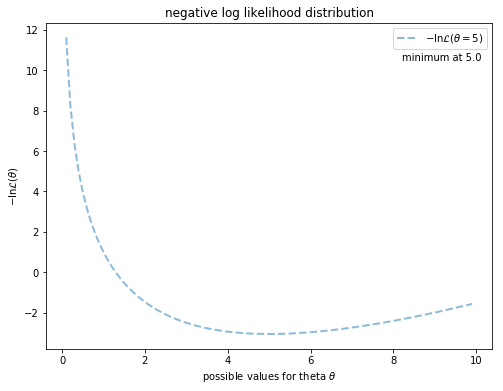

In [6]:
nll = [-loglikelihood(5,i*.1) for i in range(1,100)]
minnll = 100
for l in range(len(nll)):
    if nll[l] <= min(nll): 
        minnll = l+1
plt.figure(figsize=(8,6))
plt.plot([i*.1 for i in range(1,100)],nll,lw=2,alpha=0.5,linestyle='--',label=r'$-\ln\mathcal{L}(\theta=5)$')
plt.text(8.2, 10.5, r'minimum at {}'.format(minnll*.1))
plt.title('negative log likelihood distribution')
plt.xlabel(r'possible values for theta $\theta$')
plt.ylabel(r'$-\ln\mathcal{L}(\theta)$')
plt.legend()
plt.show()

## Binned Maximum Likelihood Fit

If we have $M$ bins with a constant bin-width of $h\equiv\frac{x_h-x_0}{M}$, then the measured contents of $b(b=1...M)$ will be
$$n_b=\int_{x_0+h(b-1)}^{x_0+hb}\sum_{i=1}^N\delta(x-x_i)dx$$

therefore the fitted bin contents will be
$$f_b(\mathbf{\theta})=\int_{x_0+h(b-1)}^{x_0+hb}\sum_{i=1}^N f(x_i;\mathbf{\theta})dx$$

Here we don't normalize $f(x;\mathbf{\theta})$ because would be just a parametrisation of the histogram and not a probaility density function.

Each bin count can be interpreted as a poisson distribution. The likelihood for the histogram becomes:
$$\mathcal{L}_b(\mathbf{\theta})=\prod_{b=1}^M \frac{f_b^{n_b}e^{-f_b}}{n_b!}$$

now we take the negative log
$$-\ln\mathcal{L}_b(\mathbf{\theta})=-\sum_{b=1}^M (n_b\ln f_b - f_b - \ln n_b!)$$

$\sum_{b=1}^M f_b$ is the fitted contents of all bins ($A(\mathbf{\theta})$). $\sum_{b=1}^M \ln n_b!$ doesn't depend on $\mathbf{\theta}$ and thefore doesn't change with the fit. Therefore we minimise a function with two terms. 
$$-\ln\mathcal{L}(\mathbf{\theta})=-\sum_{b=1}^M n_b\ln f_b+ A(\mathbf{\theta})$$

If the function normalisation is independent of the fit parameters this last term can be dropped (as in the standard ML fit).

### Binned MLE fit with one parameter

To fit a binned distribution either we need to fit multiple parameters (to determine the relation between the bin contents) or we provide a template. 

In [7]:
def get_histogram(template,n_events):
    n_bins = len(template)
    return [template[i]*n_events/sum(template) for i in range(n_bins)]

In [8]:
template = [2.,5.,3.]
data_template = get_histogram(template,30)
model_template = get_histogram(template,30)
print data_template, model_template

[6.0, 15.0, 9.0] [6.0, 15.0, 9.0]


In [9]:
def binnedloglikelihood(observed, expected):
    assert len(observed) == len(expected)
    #print observed, expected
    return sum([observed[bin_i]*math.log(expected[bin_i]) for bin_i in range(len(observed))]) - sum(expected)

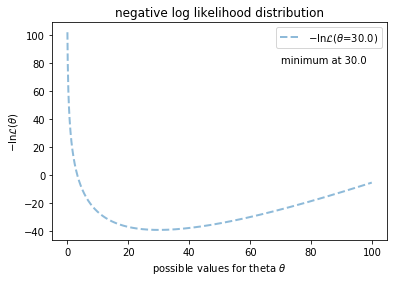

In [10]:
template = [1.,1.,1.]
data_template = get_histogram(template,30)
nll = [-binnedloglikelihood(data_template,get_histogram(template,i*.1)) for i in range(1,1000)]
minnll = 100000
for l in range(len(nll)):
    if nll[l] <= min(nll): 
        minnll = l+1
plt.figure()
plt.plot([i*.1 for i in range(1,1000)],nll,lw=2,alpha=0.5,linestyle='--',label=r'$-\ln\mathcal{L}(\theta$'+'={})'.format(sum(data_template)))
plt.title('negative log likelihood distribution')
plt.xlabel(r'possible values for theta $\theta$')
plt.ylabel(r'$-\ln\mathcal{L}(\theta)$')
plt.legend()
plt.text(70, 80, r'minimum at {}'.format(minnll*.1))
plt.show()

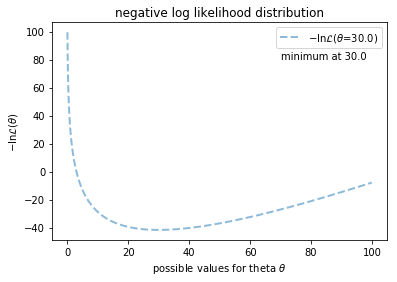

In [11]:
template = [1.,2.,3.]
data_template = get_histogram(template,30)
nll = [-binnedloglikelihood(data_template,get_histogram(template,i*.1)) for i in range(1,1000)]
minnll = 100000
for l in range(len(nll)):
    if nll[l] <= min(nll): 
        minnll = l+1
plt.figure()
plt.plot([i*.1 for i in range(1,1000)],nll,lw=2,alpha=0.5,linestyle='--',label=r'$-\ln\mathcal{L}(\theta$'+'={})'.format(sum(data_template)))
plt.title('negative log likelihood distribution')
plt.xlabel(r'possible values for theta $\theta$')
plt.ylabel(r'$-\ln\mathcal{L}(\theta)$')
plt.legend()
plt.text(70, 80, r'minimum at {}'.format(minnll*.1))
plt.show()

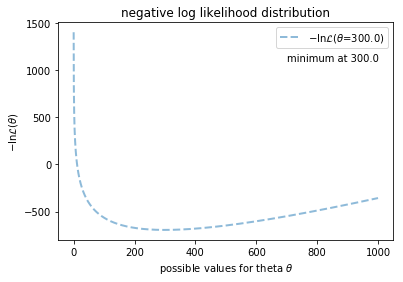

In [12]:
template = [1.,3.,1.,5.,12.,9.,10.,15.,11.,10.,6.,7.,2.,1.]
data_template = get_histogram(template,300)
nll = [-binnedloglikelihood(data_template,get_histogram(template,i*.1)) for i in range(1,10000)]
minnll = 100000
for l in range(len(nll)):
    if nll[l] <= min(nll): 
        minnll = l+1
plt.figure()
plt.plot([i*.1 for i in range(1,10000)],nll,lw=2,alpha=0.5,linestyle='--',label=r'$-\ln\mathcal{L}(\theta$'+'={})'.format(sum(data_template)))
plt.title('negative log likelihood distribution')
plt.xlabel(r'possible values for theta $\theta$')
plt.ylabel(r'$-\ln\mathcal{L}(\theta)$')
plt.legend()
plt.text(700, 1100, r'minimum at {}'.format(minnll*.1))
plt.show()

### Binned MLE with Multiple Parameters

Now we define a function that returns a 'histogram' with some gradient where the bin contents have been scaled up or down such that the total number of events is conserved

In [13]:
def get_histogram(a,n_bins,n_events):
    if a!=0:
        shape = [(i*a) for i in range(n_bins)]
    else:
        shape = [1 for i in range(n_bins)]
    return [s+(n_events/n_bins)-(sum(shape)/n_bins) for s in shape]

and test it

In [14]:
signal = get_histogram(0,4,5)
print signal, sum(signal)
signal = get_histogram(1,5,10)
print signal, sum(signal)
signal = get_histogram(.5,4,5000)
print signal, sum(signal)

[1.25, 1.25, 1.25, 1.25] 5.0
[0.0, 1.0, 2.0, 3.0, 4.0] 10.0
[1249.25, 1249.75, 1250.25, 1250.75] 5000.0


no modification to the MLE is necesarry since only the input suggestions change  but let's copy it here anyway because it's pretty.

In [15]:
def binnedloglikelihood(observed, expected):
    assert len(observed) == len(expected)
    thesum = sum(expected)
    observed, expected = checked(observed), checked(expected)
    #print observed, expected
    return sum([observed[bin_i]*math.log(expected[bin_i]) for bin_i in range(len(observed))]) - sum(expected)

In [16]:
def checked(x):
    for b in range(len(x)):
        if x[b]<=0.:
            x[b] = sum(x)*0.001
    return x

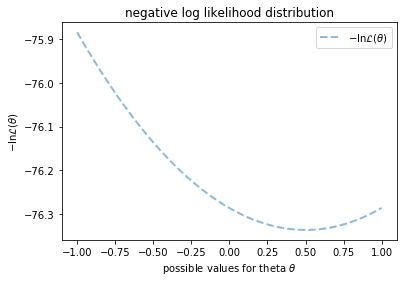

In [17]:
data_template = get_histogram(0.5,4,50)
nll = [-binnedloglikelihood(data_template,get_histogram(i*0.001-1,4,50)) for i in range(2000)]
minnll = 100.
for l in range(len(nll)):
    if nll[l] <= min(nll): 
        minnll = l
#print minnll*0.01
plt.figure()
plt.plot([i*0.001-1 for i in range(2000)],nll,lw=2,alpha=0.5,linestyle='--',label=r'$-\ln\mathcal{L}(\theta$)')
plt.title('negative log likelihood distribution')
plt.xlabel(r'possible values for theta $\theta$')
plt.ylabel(r'$-\ln\mathcal{L}(\theta)$')
plt.legend()
plt.show()

In [18]:
new_array = np.empty((500, 20))
minnll = 10000
mini = 0
minj = 0
for i in range(500):
    for j in range(20):
        nll = -binnedloglikelihood(data_template,get_histogram(i*0.01-3,4,40+j))
        new_array[i,j] = nll
        if nll < minnll:
            minnll = nll
            mini = i
            minj = j

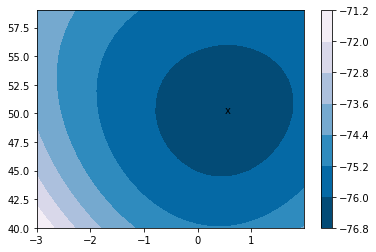

In [23]:
from matplotlib import cm
X,Y = np.meshgrid([i*0.01-3 for i in range(500)], [40+i for i in range(20)])
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, new_array.transpose(), cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)
plt.text(.5, 50, 'x')
plt.show()

## Binned $\chi^2$ Fit

if the expected number of events in each bin is large then we can swap out the poisson distribution in each bin with a gaussian.

$$\mathcal{L}_{\chi^2}(\mathbf{\theta})=\prod_{b=1}^M \frac{1}{\sqrt{2\pi f_b}}e^{-(n_b-f_b)^2/2f_b}$$

giving a logarithm.

$$-\ln\mathcal{L}_{\chi^2}(\mathbf{\theta})=-\sum_{b=1}^M \frac{1}{\sqrt{2\pi f_b}}+\frac{1}{2}\sum_{b=1}^M\frac{(n_b-f_b)^2}{f_b}$$

if $f_b$ is large enough then $f_b$ in the first term can be swapped with $n_b$ which is independent of the fit parameters and therefore can be dropped in the minimisation. 

Dropping this gives the $\chi^2$ formula. 
$$\chi^2\equiv=-2\ln\mathcal{L}_{\chi^2}(\mathbf{\theta})=\sum_{b=1}^M\frac{(n_b-f_b)^2}{f_b}$$

Therefore a $\chi^2$ fit assumes the number of events in each bin is large. 

In [20]:
def binnedChi2(observed, expected):
    assert len(observed) == len(expected)
    #print observed, expected
    return sum([((observed[bin_i] - expected[bin_i])**2)/expected[bin_i] for bin_i in range(len(observed))])

We need to redefine the template

In [21]:
def get_histogram(template,n_events):
    n_bins = len(template)
    return [template[i]*n_events/sum(template) for i in range(n_bins)]

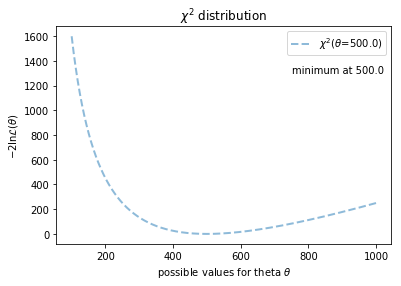

In [22]:
template = [1.,4.,10.,25.,70.,75.,65.,25.,10.,4.,1.]
data_template = get_histogram(template,500)
chi2 = [binnedChi2(data_template,get_histogram(template,i*.1)) for i in range(1000,10000)]
minchi = 100000
for l in range(len(chi2)):
    if chi2[l] <= min(chi2): 
        minchi = l+1000
plt.figure()
plt.plot([i*.1 for i in range(1000,10000)],chi2,lw=2,alpha=0.5,linestyle='--',label=r'$\chi^2(\theta$'+'={})'.format(sum(data_template)))
plt.title(r'$\chi^2$ distribution')
plt.xlabel(r'possible values for theta $\theta$')
plt.ylabel(r'$-2\ln\mathcal{L}(\theta)$')
plt.legend()
plt.text(750, 1300, r'minimum at {}'.format(minchi*.1))
plt.show()